In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

# Importar datos
ruta = 'DataDLC/videos_entrenamiento/WIN_20220727_22_40_41_ProDLC_resnet50_PruebaCondaMay10shuffle1_112000.h5'
df = pd.read_hdf(ruta)['DLC_resnet50_PruebaCondaMay10shuffle1_112000']

# Extraer datos de la nariz
nariz = df['nose'].copy()

# Extraer datos de la cabeza
cabeza = df['neck'].copy()

# Extraer posiciones de los objetos
x1 = df['obj_1'].mean()['x']
y1 = df['obj_1'].mean()['y']
obj1 = np.repeat([[x1, y1]], len(nariz), axis=0)

x2 = df['obj_2'].mean()['x']
y2 = df['obj_2'].mean()['y']
obj2 = np.repeat([[x2, y2]], len(nariz), axis=0)

df.head()

4048

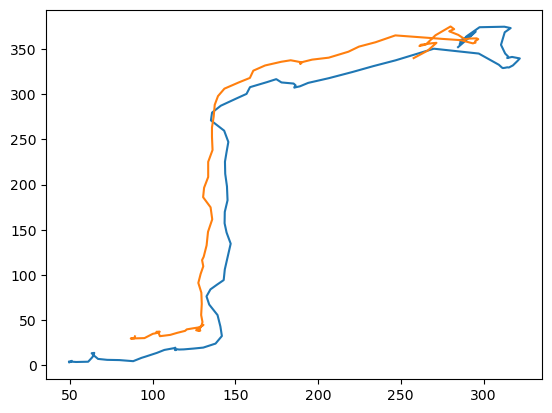

In [24]:
# Extaer posiciones en los dos ejes
xn = nariz['x']
yn = nariz['y']

xc = cabeza['x']
yc = cabeza['y']

# Graficar
plt.plot(xn[1000:1100], yn[1000:1100])
plt.plot(xc[1000:1100], yc[1000:1100])

In [25]:
# Escribir las posiciones como puntos en R²
puntosN = np.dstack((xn, yn))[0]
puntosC = np.dstack((xc, yc))[0]

# Calcular distancias de cada punto a cada objeto
dist1 = np.linalg.norm(puntosN - obj1, axis=1)
dist2 = np.linalg.norm(puntosN - obj2, axis=1)

# Filtrar puntos cercanos al objeto 1
distanciaMaxima = 20 # cm
cercanos1 = puntosN[dist1 < distanciaMaxima]

# Filtrar puntos cercanos al objeto 2
cercanos2 = puntosN[dist2 < distanciaMaxima]

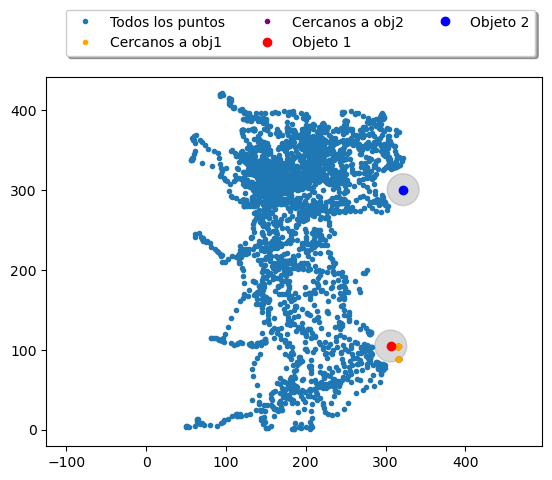

In [6]:
# Graficar objetos y puntos cercanos
fig, ax = plt.subplots()

ax.plot(xn, yn, ".", label = "Todos los puntos")

ax.plot(cercanos1[:, 0], cercanos1[:, 1], ".", label = "Cercanos a obj1", color = "orange")
ax.plot(cercanos2[:, 0], cercanos2[:, 1], ".", label = "Cercanos a obj2", color = "purple")

ax.plot([x1], [y1], "o", lw = 20, label = "Objeto 1", color = "red")
ax.plot([x2], [y2], "o", lw = 20, label = "Objeto 2", color = "blue")

ax.add_artist(Circle((x1, y1), distanciaMaxima, color = "grey", alpha = 0.3))
ax.add_artist(Circle((x2, y2), distanciaMaxima, color = "grey", alpha = 0.3))

ax.axis('equal')

ax.legend(bbox_to_anchor = (0, 0.2, 1, 1), ncol=3, fancybox=True, shadow=True)


El criterio completo debería ser:

1. Nariz cercana al objeto.

2. Que la nariz esté más cerca que la cola (o que la cabeza).

3. Parametrizar la recta nariz-cola (o nariz-cabeza) y fijarnos si interseca al objeto (nos dice que lo está mirando).

In [73]:
v0 = obj1 - puntosC
v1 = puntosN - puntosC

v0 = v0 / np.repeat(np.linalg.norm(v0, axis=1), 2, axis=1)
v1 = v1 / np.linalg.norm(v1, axis=1)

angulo = np.zeros(len(v0))

for i in range(len(v0)):
    angulo[i] = np.arccos(np.dot(v0[i], v1[i]))

#plt.plot(angulo / np.pi)
#plt.plot(v0[:, 0], v0[:, 1])
punto = 1200
plt.plot(v1[punto, 0], v1[punto, 1], ".")
plt.plot(v0[punto, 0], v0[punto, 1], ".")
plt.axhline(0)
plt.axvline(0)
#plt.plot(obj1[:, 0], obj1[:, 1], "o")

print(angulo[punto])
print(np.dot(v0[punto], v1[punto]))



AxisError: axis 1 is out of bounds for array of dimension 1

In [76]:
print(np.rad2deg(np.arccos(np.dot([np.sqrt(2) / 2, np.sqrt(2) / 2], [1, 0]))))
print(v0[punto], v1[punto])
print(np.linalg.norm(v0).shape)
print(np.linalg.norm(v1, axis=1).shape)
print(np.repeat([[], []], 2, axis=1))

45.0
[  87.17534199 -209.67680814] [ 13.85295105 -24.81680298]
()
(4048,)
[]


In [33]:
v0

array([[-0.00052462, -0.00013214],
       [-0.00052399, -0.00012972],
       [-0.00052204, -0.00012368],
       ...,
       [ 0.00537769, -0.01700482],
       [ 0.00543004, -0.01684105],
       [ 0.00569596, -0.01669078]])

In [5]:
v0 = obj1 - puntosC
v1 = puntosN - puntosC

print(v0.shape, v1.shape)

(4048, 2) (4048, 2)
